<a href="https://colab.research.google.com/github/i-am-batman-28/Financial_Forecasting_Project/blob/main/Karthik_M_Sarma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment: Analysis of Candlestick Data using Unsupervised Learning like Clustering**


*Objective: Application of unsupervised learning techniques to identify clusters on
candlestick data and extract insights for trading decisions. Identified clusters shall represent
some candlestick chart patterns and/or price action patterns which can be utilised to make
better trading decisions.*

Tasks:
1. Data Pre-processing: Load the dataset and perform any necessary pre-processing
(Like Normalization of the data)

2. Feature Engineering: Create relevant features from the candlestick data (Hint: take
data from past 30 or 60 candles)

3. Clustering:
a. Apply a clustering algorithm to identify patterns or clusters.
b. Determine the optimal number of clusters.

4. Cluster Analysis and Insights: Analyse each cluster to identify common characteristics
(patterns, trends, correlations)

5. Trading Insights:
a. Summarize the key insights gained from the clustering analysis. Explain how
the identified clusters can be used to inform trading decisions and strategies.
(Hint: check if price moves up/down in next 5 minutes)
b. Provide recommendations on how the insights from this analysis can be
leveraged to improve trading performance or develop new trading
approaches.
c. Identify examples, such as price movements and target percentages

###Task 1:

Step 1: Importing google drive from colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Importing the necessary libraries that are initially required to load the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/s1.csv')

Step 3: Doing basic operations for understanding the dataset before data preprocessing.

In [ ]:
df

,date,time,open,high,low,close,volume,open_interest
0,2017-01-02,09:15:00,100.00,100.28,100.00,100.02,7000.0,100000.0
1,2017-01-02,09:16:00,100.02,100.07,100.02,100.06,3509.0,101212.0
2,2017-01-02,09:17:00,100.05,100.06,99.70,99.73,5105.0,101212.0
3,2017-01-02,09:18:00,99.71,99.79,99.63,99.79,4959.0,101212.0
4,2017-01-02,09:19:00,99.78,99.82,99.69,99.70,2398.0,102480.0
...,...,...,...,...,...,...,...,...
65828,2017-09-15,15:13:00,136.47,136.47,136.46,136.47,1532.0,123805.0
65829,2017-09-15,15:14:00,136.46,136.49,136.44,136.47,2433.0,123805.0
65830,2017-09-15,15:15:00,136.49,136.50,136.45,136.48,1789.0,123805.0
65831,2017-09-15,15:16:00,136.48,136.49,136.47,136.49,1240.0,123622.0


In [ ]:
df.head()

,date,time,open,high,low,close,volume,open_interest
0,2017-01-02,09:15:00,100.00,100.28,100.00,100.02,7000.0,100000.0
1,2017-01-02,09:16:00,100.02,100.07,100.02,100.06,3509.0,101212.0
2,2017-01-02,09:17:00,100.05,100.06,99.70,99.73,5105.0,101212.0
3,2017-01-02,09:18:00,99.71,99.79,99.63,99.79,4959.0,101212.0
4,2017-01-02,09:19:00,99.78,99.82,99.69,99.70,2398.0,102480.0


In [ ]:
df.describe()

,open,high,low,close,volume,open_interest
count,65833.000000,65833.000000,65833.000000,65832.000000,65832.000000,65832.000000
mean,122.299854,122.324621,122.273793,122.299872,1099.530472,130418.430475
std,10.421539,10.421160,10.430107,10.421242,1461.021361,25710.010454
min,98.160000,98.210000,13.000000,98.160000,6.000000,50677.000000
25%,114.290000,114.310000,114.260000,114.290000,316.000000,113967.000000
50%,124.850000,124.880000,124.820000,124.850000,626.000000,129080.000000
75%,131.170000,131.190000,131.150000,131.170000,1310.000000,145057.000000
max,138.670000,138.710000,138.550000,138.660000,48992.000000,196359.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65683 entries, 150 to 65832
Columns: 279 entries, date to cluster
dtypes: datetime64[ns](1), float64(276), int32(1), object(1)
memory usage: 140.1+ MB


In [ ]:
df.shape

(65683, 279)

In [ ]:
df_copy = df.copy()

In [ ]:
df.isna().sum()

date          0
time          0
open          0
high          0
low           0
             ..
low_lag_27    0
low_lag_28    0
low_lag_29    0
low_lag_30    0
cluster       0
Length: 279, dtype: int64

Step 4: Doing Basic Data preprocessing by converting all the data into usable format and handling missing or null values.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time']).dt.time

<ipython-input-5-a6542f1eee0b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']).dt.time


In [ ]:
cat = df.columns[df.dtypes == 'object']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Handling missing values using the strategy (mean) for the columns with numerical data.

In [ ]:
si = SimpleImputer(strategy = 'mean')
df[['close', 'volume','open_interest' ]] = si.fit_transform(df[['close', 'volume','open_interest' ]])

In [ ]:
df.isna().sum()

date             0
time             0
open             0
high             0
low              0
close            0
volume           0
open_interest    0
dtype: int64

Scaling the numerical columns for normalization of the data.
This ensures :

*   Equalizing Feature Influence
*   Improving Convergence
*   Handling Different Units and Scales
*   Enhancing Interpretability
*   Robustness to Outliers









###Task 2:

Step 1: Creating 60 lagging features for 60 minutes.


1.   Capturing Temporal Dependencies:

*   In time series data, the current value of a variable can be dependent on its past values. By including lagging features, you can capture these temporal dependencies, which can help in identifying more meaningful clusters.
*   Here, we can use these lagging features to create a KMeans clustering model for our dataset as the historical or past values are a good way for determining or making a predictive model


2.  Improving Cluster Quality:



*  By incorporating the history of the data points, clustering  algorithms can form more cohesive and distinct clusters, improving the overall quality of the clusters.





In [ ]:
import warnings
def features(df, p =60):
  for n in range(1, p+1):
        df[f'close_feature{n}'] = df['close'].shift(n)
        df[f'high_feature{n}'] = df['high'].shift(n)
        df[f'low_feature{n}'] = df['low'].shift(n)
        df[f'volume_feature{n}'] = df['volume'].shift(n)
  df.dropna(inplace=True)
  return df

df = features(df, p=60)
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented*", category=UserWarning)



Step 2: As the dataset was too large to handle , I used a fraction as the sample for the clustering as the latter was highly computationally exhaustive and my computer coud not handle it .

In [ ]:
dfn = df.sample(frac=0.2, random_state=42)


In [ ]:
dfn_copy = dfn.copy()

###Task 3:

3.a:


Step 1: Importing the necessary modules from the respective libraries for KMeans clustering.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
datetime_columns = dfn.select_dtypes(include=['datetime']).columns
numerical_columns = dfn.select_dtypes(include=['number']).columns.difference(datetime_columns)
for column in numerical_columns:
    if column != 'clusters':
        me = MinMaxScaler()
        df[column] = me.fit_transform(df[[column]])

to_fit = dfn[numerical_columns]
feature_columns = [i for i in dfn.columns if 'feature' in i]
features = dfn[feature_columns]


Step 2: Calculating the silhouette score as this score is a metric used to evaluate the quality of a clustering solution. It provides a measure of how similar each point in a cluster is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where:


*   +1: Indicates that the point is well matched to its own cluster and poorly matched to neighboring clusters.
*   0: Indicates that the point is on or very close to the decision boundary between two neighboring clusters.
*   -1: Indicates that the point might have been assigned to the wrong cluster.







In [ ]:
K = range(2, 7)
silhouette_scores = []

for n in K:
    km = KMeans(n_clusters=n, random_state = 42, n_init = 7)
    km.fit(to_fit)
    lb = km.labels_
    silhouette_scores.append(silhouette_score(to_fit, lb))


3.b

Step 1: Finding the optimal or ideal number of clusters by using the max() function for the silhouette scores.

In [ ]:
ideal_k_indexing = silhouette_scores.index(max(silhouette_scores))
ideal_k = K[ideal_k_indexing]
print(ideal_k)

2


###Task 4:

Step 1: Analysing the trend for how the silhouette score is changing with changing number of clusters simultaneously.


1.   We can observe the graph is a declining graph with its peak at 2 reaching a silhouette score of nearly 0.42 and gradually decreasing with a sudden drop from K =2 to K =3, and finally reaching a lowest score of 0.28 when K =6



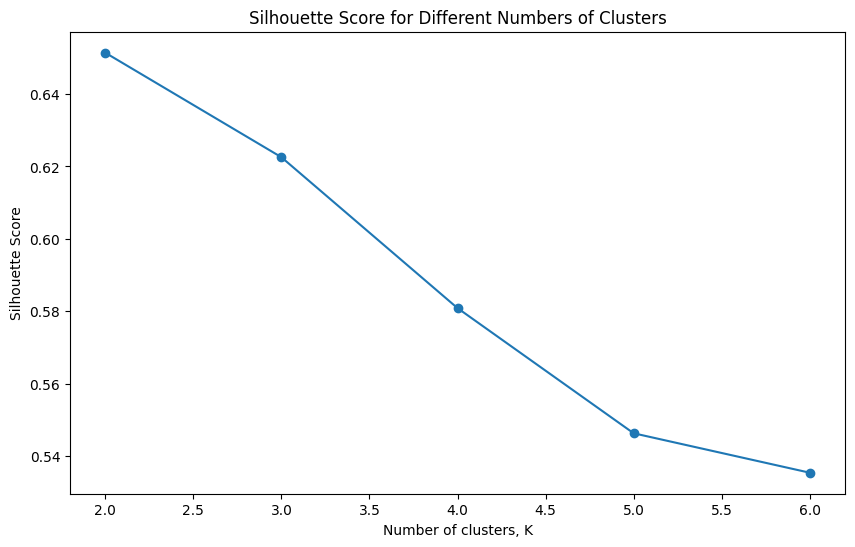

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
dfn.reset_index(drop=True, inplace=True)
kmm = KMeans(n_clusters=ideal_k, n_init=7, random_state=42)
dfn['clusters'] = kmm.fit_predict(to_fit)
print(dfn)


             date      time      open      high       low     close    volume  \
0      2017-05-03  12:18:00  0.604295  0.603704  0.873278  0.604691  0.003348   
1      2017-09-06  13:03:00  0.873118  0.872593  0.959777  0.873086  0.013963   
2      2017-07-25  12:50:00  0.896569  0.895556  0.967423  0.896296  0.001306   
3      2017-01-18  13:10:00  0.178968  0.178519  0.736041  0.179753  0.012167   
4      2017-06-01  11:46:00  0.728956  0.728395  0.913421  0.729630  0.007288   
...           ...       ...       ...       ...       ...       ...       ...   
13137  2017-04-10  13:52:00  0.490990  0.490370  0.836320  0.490370  0.014800   
13138  2017-06-09  14:22:00  0.775364  0.774321  0.928395  0.775309  0.007880   
13139  2017-04-25  14:56:00  0.554678  0.554568  0.857109  0.555556  0.009778   
13140  2017-07-28  14:45:00  0.947174  0.946173  0.983751  0.947160  0.014923   
13141  2017-03-03  10:17:00  0.358924  0.357778  0.793708  0.358765  0.014923   

       open_interest  close

<ipython-input-120-9ed5cfe86313>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfn['clusters'] = kmm.fit_predict(to_fit)


Step 3: Importing another important module from Python for plotting and cluster analysis

In [ ]:
import seaborn as sns

Step 4:

1.   Creating a count plot for determining the frequency or occurence of each cluster that has been created.
2.   Here, we can observe that the the first cluster i.e. represented in blue , has a greater frequency of above 7000 while the second cluster i.e. represented in light green , has a lower frequency of nearly 6000




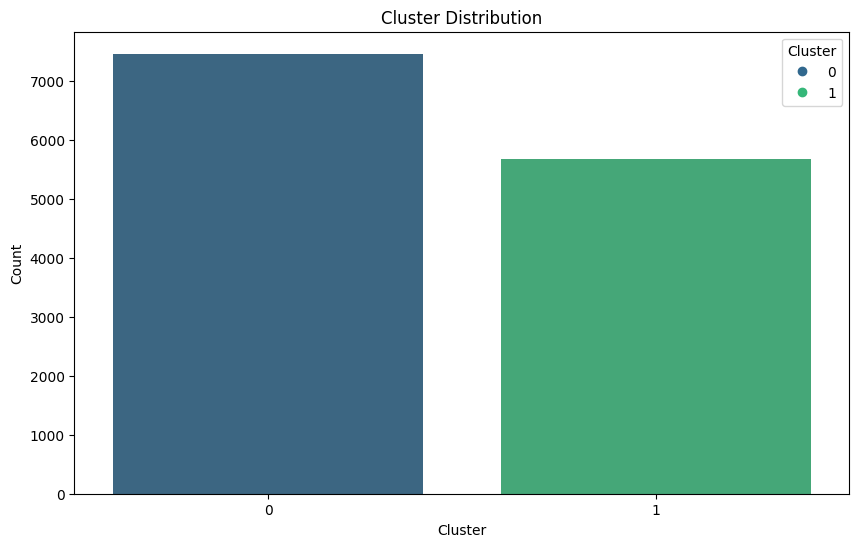

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', hue = 'clusters', data=dfn, palette='viridis')
cluster_labels = dfn['clusters'].unique()
palette = sns.color_palette('viridis', len(cluster_labels))
legend = [plt.Line2D([0, 1], [0, 1], color=palette[i], marker='o', linestyle='') for i in range(len(cluster_labels))]
plt.legend(legend, cluster_labels, title="Cluster")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

Step 5 :
1.   Creating centroids which are the centers of the clusters.

2.   The centroids help us create a heatmap which is useful in understanding the contribution of each feature to the clusters and value of each centroid in each cluster.



In [ ]:
centroids = kmm.cluster_centers_
print("Shape of centroids:", centroids.shape)


Shape of centroids: (2, 246)


In [ ]:
df_analysis  = dfn.drop(columns = ['date', 'time'])
cluster_analysis = df_analysis.groupby('clusters').mean()
print(cluster_analysis)

                open        high         low       close       volume  \
clusters                                                                
0         123.142479  123.168682  123.118055  123.142945  1159.156770   
1         121.426595  121.450363  121.403656  121.427029  1023.228855   

          open_interest  close_feature1  high_feature1  low_feature1  \
clusters                                                               
0         112197.952969      123.142200     123.167550    123.117170   
1         153118.614764      121.426423     121.449936    121.403042   

          volume_feature1  ...  low_feature58  volume_feature58  \
clusters                   ...                                    
0             1156.418147  ...     123.074630       1141.526915   
1             1028.477047  ...     121.384671       1092.456196   

          close_feature59  high_feature59  low_feature59  volume_feature59  \
clusters                                                               

Step 6: Analysing the cluster by grouping the columns by the cluster column , which helps us analyze each cluster with the values corresponding to them for each feature.



   

*   Cluster Analysis



1.   Cluster 0:


Open, High, Low, Close Prices:



*   Open: 123.142
*   High: 123.169

*   Low: 123.118
*   Close: 123.143









Volume and Open Interest:


*   Volume: 1159.157
*   Open Interest: 112197.953

Derived Features (Feature 1 to Feature 60):


*   Close Feature 1: 123.142

*   High Feature 1: 123.168


*   Low Feature 1: 123.117


*   Volume Feature 1: 1156.418


*   Close Feature 60: 123.099

*   High Feature 60: 123.124



*   Low Feature 60: 123.074



*   Volume Feature 60: 1138.691

The values across these derived features are fairly consistent, suggesting that the data points in Cluster 0 are tightly grouped around these price levels and volumes. This implies a relatively stable or less volatile market condition for this cluster.

2. Cluster 1:

Open, High, Low, Close Prices:



*   Open: 121.427


*   High: 121.450


*   Low: 121.404


*   Close: 121.427

Volume and Open Interest:



*   Volume: 1023.229


*   Open Interest: 153118.615

Derived Features (Feature 1 to Feature 60):



*   Close Feature 1: 121.426



*   High Feature 1: 121.450



*   Low Feature 1: 121.403



*   Volume Feature 1: 1028.477




*   Close Feature 60: 121.408

*   High Feature 60: 121.432



*   Low Feature 60: 121.384



*   Volume Feature 60: 1051.379


Similar to Cluster 0, the derived feature values in Cluster 1 show consistency, indicating that the data points in this cluster also demonstrate a stable or less volatile market condition. However, the absolute values of prices and volumes are lower than those in Cluster 0.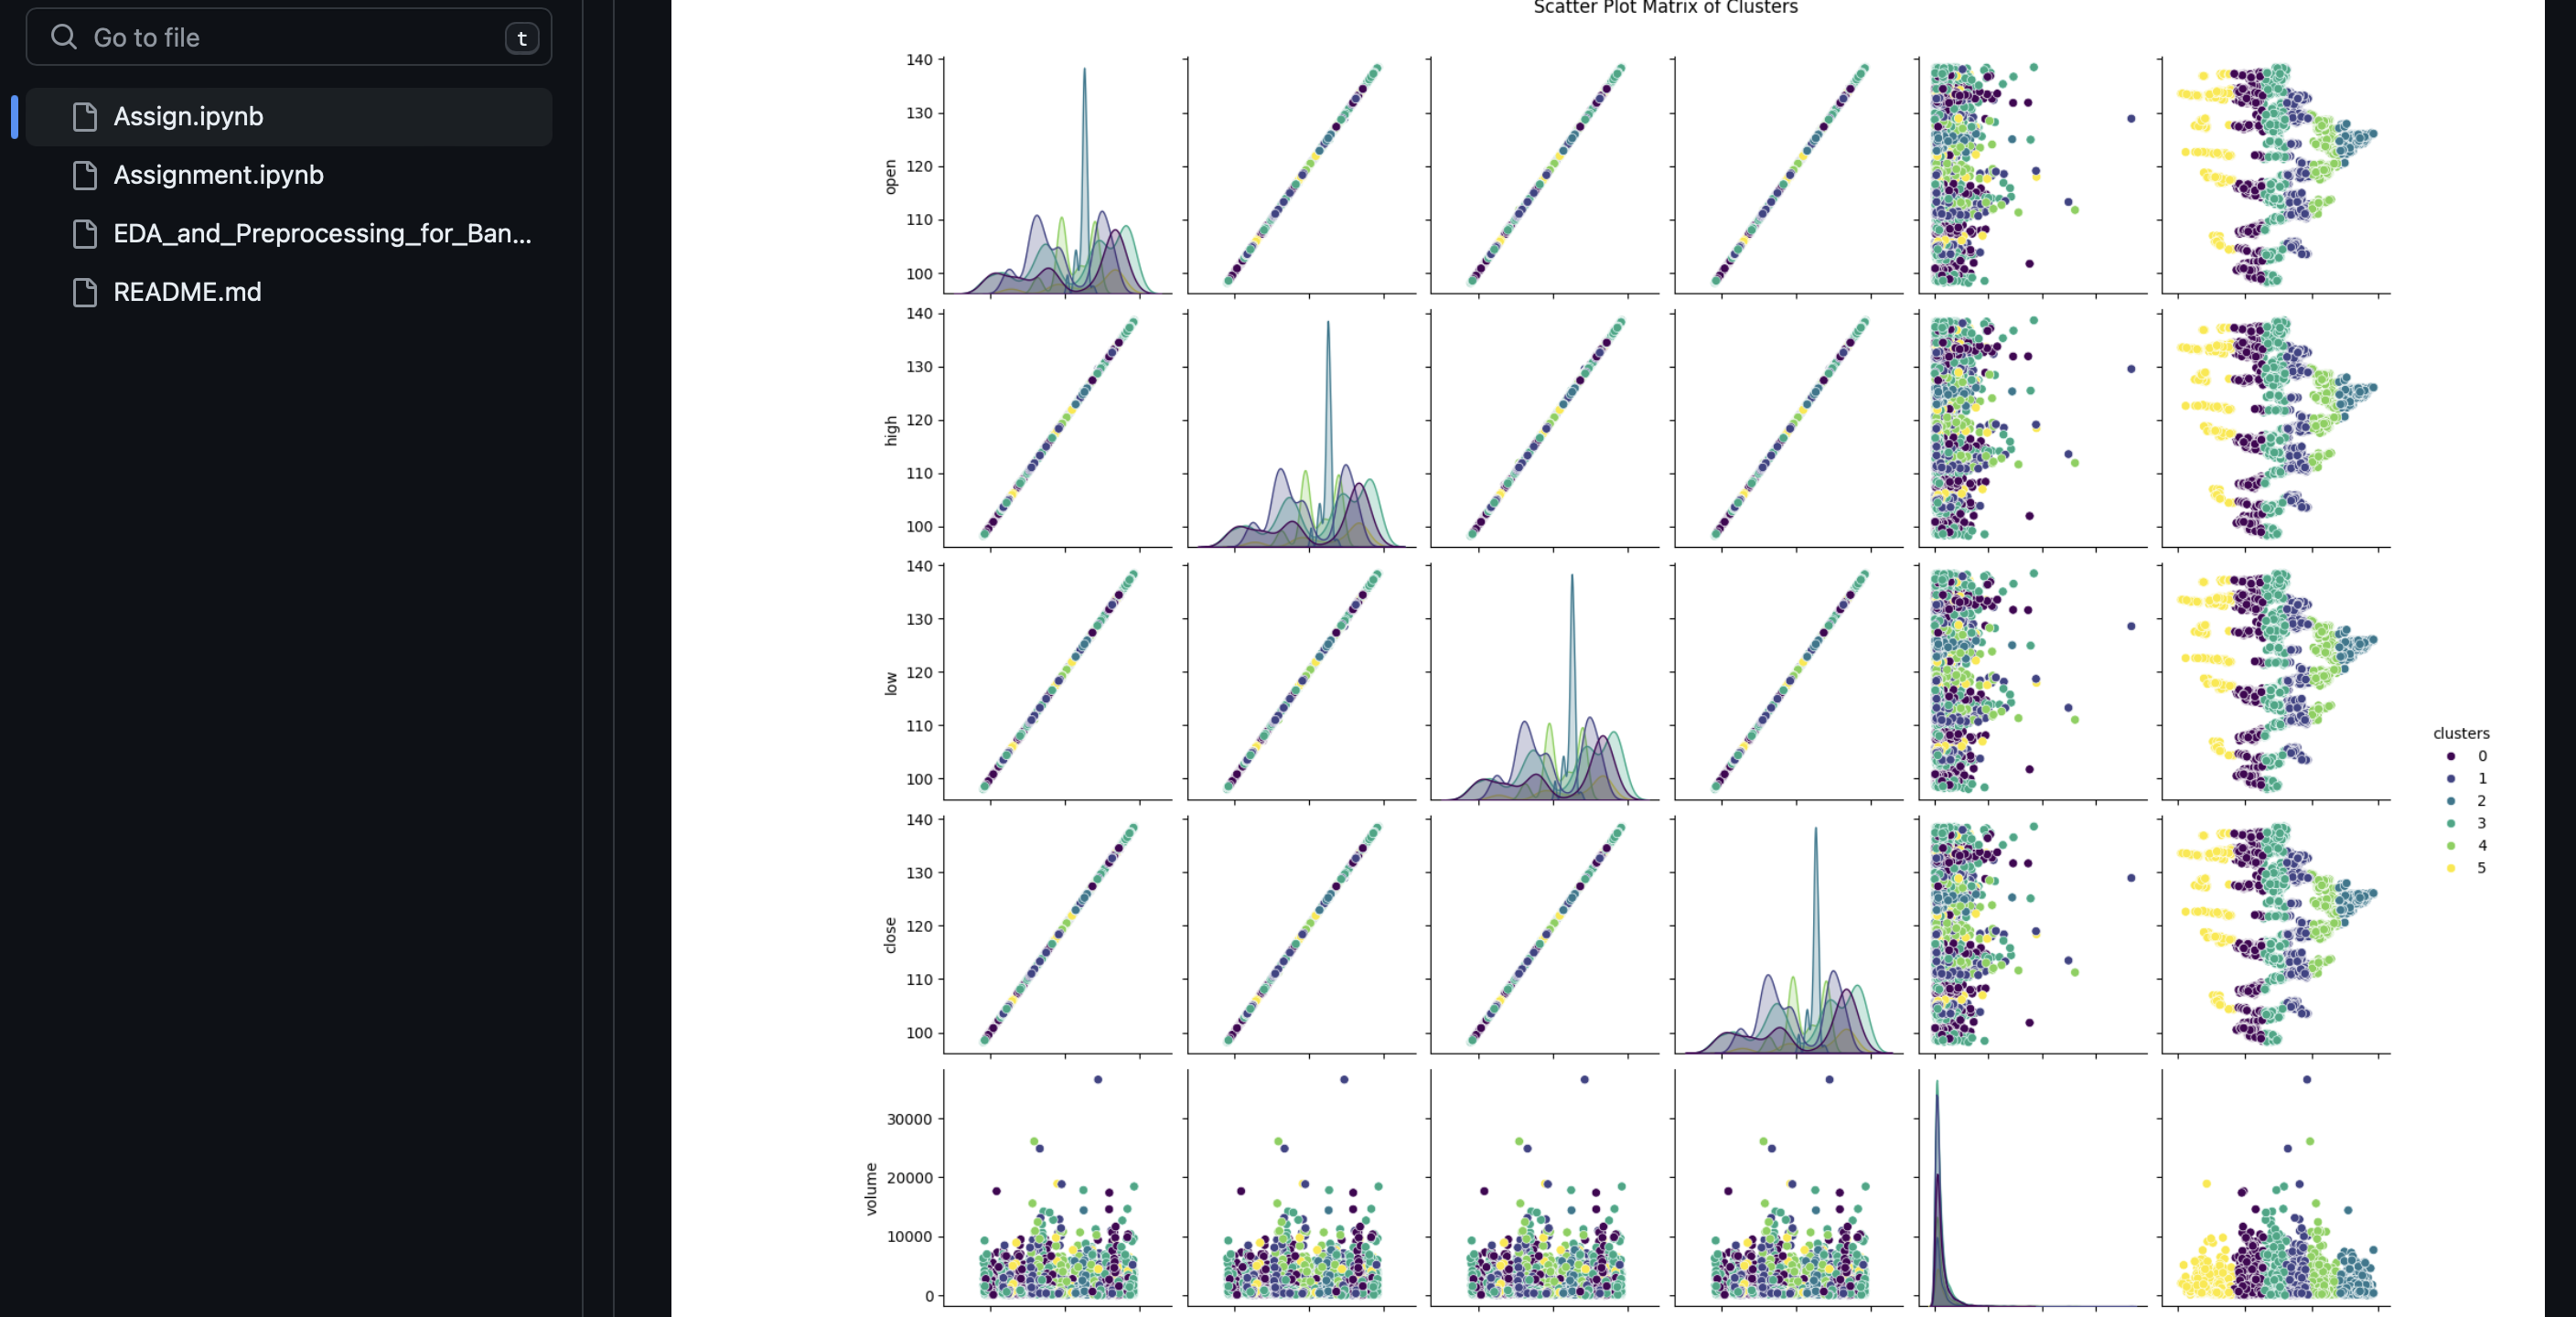




In [ ]:
#sns.pairplot(dfn, hue = 'clusters' palette='viridis', markers='o')
#plt.suptitle("Scatter Plot Matrix of Clusters", y=1.02)
#plt.figure(figsize=(10, 6), dpi=100)
#plt.show()







1.   Here is the code for creating a pairplot. The image above is for a pair plot that I had used in another project, to show how for changing trends the different clusters are determining the separation between the clusters and the contribution of each cluster to each feature.
2.   For example, here the cluster 4 seems to be at the upper tip of most features.






(note: this pairplot shows a variety of plots including scatter plots , histograms and Kernel density estimation (KDE) plots which together help in understanding the relationship between features in the dataset across each cluster and the the seperating between clusters.)


In [ ]:
#centroids_df = pd.DataFrame(centroids, columns=feature_columns)

#plt.figure(figsize=(10, 6))
##sns.heatmap(centroids_df.T, annot=True, cmap="viridis")
#plt.title("Cluster Centroids")
#plt.show()

(Note: The heatmap was highly computationally exhaustive for my computer so I have created another heatmap for a single feature alone later in this assignment)

###Task 5:

5a

###Inference

   **Price Levels:**


*   Cluster 0 has higher price levels compared to Cluster 1.




*    This could indicate that Cluster 0 represents a time or segment where the market prices were generally higher.

**Volume and Open Interest:**


*   Cluster 0 has higher trading volumes compared to Cluster 1, but Cluster 1 has higher open interest. This suggests that while more trading activity occurred in Cluster 0, more positions were held open in Cluster 1, indicating differing market behaviors or trader strategies.

**Stability:**

*  Both clusters show stable derived feature values, implying that both clusters represent periods of low volatility or stable market conditions.


 **Market Conditions:**

*  The data could be segmented based on different market conditions or time periods. Cluster 0 might represent a bullish market with higher prices and more trading activity, while Cluster 1 might represent a bearish or consolidating market with lower prices but higher open interest.




**Conclusion:**


*   The two clusters represent distinct segments of the market with different price levels, volumes, and open interest.


*   Cluster 0 shows higher prices and volumes, indicating a possibly more active or bullish market, whereas Cluster 1 shows lower prices and higher open interest, suggesting a period where traders are holding more positions, possibly in anticipation of future price movements.


*   Both clusters exhibit stable conditions, indicating low volatility in the respective segments.
















1.   From the code below , we can understand that there is initially a decrease in the price of the stock for the date '2017-05-19' , and then there is a increase in the prices for the next two dates and there is a decrease again of '-15.45'.
2.   When we see an up price movement , we can understand that the buyer can enter a long position while when the price movement is a 'down' price movement , the buyer can enter a short position.





In [ ]:
dfn.reset_index(drop=True, inplace=True)
dfn_copyy = dfn.copy()

dfn_copyy['price_change_5_min'] = dfn_copyy['close'].shift(-5) - dfn_copyy['close']
dfn_copyy['price_movement'] = dfn_copyy['price_change_5_min'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')
dfn_copyy.dropna(subset=['price_change_5_min'], inplace=True)
dfn_copyy

,date,time,open,high,low,close,volume,open_interest,clusters,price_change_5_min,price_movement
0,2017-05-17,10:13:00,125.90,125.90,125.85,125.86,433.0,182602.0,1,-7.47,Down
1,2017-03-20,14:26:00,116.32,116.34,116.32,116.34,222.0,116105.0,0,-2.37,Down
2,2017-03-07,10:46:00,113.60,113.61,113.58,113.58,269.0,125742.0,0,-13.09,Down
3,2017-07-21,13:31:00,132.50,132.55,132.50,132.55,439.0,141248.0,1,-13.37,Down
4,2017-05-15,13:05:00,125.34,125.34,125.30,125.31,620.0,181584.0,1,0.09,Up
...,...,...,...,...,...,...,...,...,...,...,...
13157,2017-03-31,13:25:00,118.32,118.34,118.32,118.34,304.0,132411.0,0,9.02,Up
13158,2017-01-16,11:08:00,104.40,104.44,104.40,104.43,579.0,128371.0,0,8.88,Up
13159,2017-07-19,10:42:00,132.60,132.61,132.59,132.60,327.0,139816.0,1,-17.64,Down
13160,2017-09-11,09:46:00,134.43,134.49,134.43,134.49,1550.0,98739.0,0,-11.58,Down







1.   The code below shows the price movement between the 'second five minute' period, with an inital 'down' price movement for the dates '2017-05-19' and '2017-03-08' , and then an increase in price movement.


2.   Here again , when we see an 'up' price movement , we can understand that the buyer can enter a long position while when the price movement is a 'down' price movement , the buyer can enter a short position.





In [ ]:
dfn['price_change_10_min'] = dfn['close'].shift(-10) - dfn['close'].shift(-5)
dfn['price_movement'] = dfn['price_change_10_min'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

dfn.dropna(subset=['price_change_10_min'], inplace=True)
dfn


,date,time,open,high,low,close,volume,open_interest,close_feature1,high_feature1,...,low_feature59,volume_feature59,close_feature60,high_feature60,low_feature60,volume_feature60,clusters,price_change_5_min,price_movement,price_change_10_min
0,2017-05-19,11:30:00,125.22,125.26,125.20,125.23,3339.0,175502.0,125.24,125.28,...,125.60,363.0,125.63,125.67,125.63,304.0,1,-17.33,Down,-3.49
1,2017-03-08,11:13:00,113.52,113.52,113.43,113.44,2479.0,120078.0,113.52,113.54,...,113.93,211.0,113.97,113.99,113.97,538.0,0,20.01,Down,-19.25
2,2017-01-05,09:47:00,99.45,99.46,99.44,99.44,462.0,116129.0,99.45,99.46,...,98.53,825.0,98.54,98.56,98.52,1667.0,0,17.50,Up,21.24
3,2017-09-07,10:38:00,134.10,134.10,134.07,134.07,403.0,94383.0,134.11,134.14,...,134.06,1018.0,134.06,134.10,134.06,702.0,0,-15.45,Up,0.28
4,2017-01-09,12:28:00,100.72,100.72,100.68,100.69,327.0,100120.0,100.72,100.72,...,100.74,164.0,100.77,100.78,100.76,556.0,0,36.21,Down,-4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,2017-06-28,10:36:00,127.54,127.61,127.54,127.55,515.0,103177.0,127.55,127.64,...,127.74,3339.0,127.78,127.93,127.76,3953.0,0,5.99,Down,-10.65
13126,2017-08-28,14:18:00,133.87,133.88,133.85,133.85,181.0,79500.0,133.88,133.89,...,133.77,1415.0,133.79,133.83,133.79,1316.0,0,2.93,Down,-23.14
13127,2017-01-17,10:55:00,105.10,105.10,105.01,105.02,1240.0,135053.0,105.10,105.10,...,105.45,1298.0,105.47,105.53,105.46,4292.0,1,20.38,Down,-0.57
13128,2017-07-27,13:28:00,137.07,137.09,137.05,137.07,193.0,94357.0,137.07,137.10,...,136.91,2304.0,136.97,137.07,136.96,2017.0,0,-20.38,Up,2.88


5b

In [ ]:
centroid1 = 0.79
centroid2 = 0.93

relative_diff = abs(centroid2 - centroid1) / min(centroid1, centroid2)
print("Relative Difference:", relative_diff)

Relative Difference: 0.17721518987341772


### Recommendations for Trading Performance

- *Cluster-based Strategy:* In this cluster there is a pattern where prices tend to fall over the first 5 minutes, consider taking a long position when data points fall into this cluster. When the prices increase over the first minutes , consider taking the short position.

- *Risk Management:* Avoid trading during periods identified as high volatility clusters unless your strategy is designed to handle such volatility.
Use stop-loss orders aligned with historical price movements within each cluster to mitigate risks.


1.   Cluster A (Up 21.24%): When certain indicators suggest a price rise, target a 20% gain within the identified timeframe.
2.   Cluster B (Down -23.14%): When conditions suggest a downtrend, target a 23% drop, or consider shorting the asset.



- *Feature Importance:* The features are most significant in defining each cluster. Here, we can observe a relative difference in centroids of 17.72% ; greater than 10% which helps us understand that the feature 'low' in this model is important in distinguishing the clusters.

(note: as I wasn't able to execute the heatmap for the other features, I  cannot comment on them. )







###Further Recommendations:


*Trend Following Strategy:*


*Volume-Based Confirmation:*


*   Higher volumes can confirm the significance of a trend. For example, if a cluster with a "Down" signal also shows a high volume, the likelihood of a significant price drop is higher.

*Stop-Loss and Take-Profit Levels:*

*   For upward movements, set stop-loss orders slightly below the entry price and take-profit orders at the target percentage (e.g., 15-20% above the entry).


*   For downward movements, set stop-loss orders slightly above the entry price and take-profit orders at the target percentage (e.g., 10-20% below the entry).


By using clustering analysis and the observed target percentages, traders can make more informed decisions and set realistic targets based on historical data patterns.

Step 1: Repeating the Task 2 for a single feature, in this case ; 'low' and analysing it.

Also, here I have taken the sample for analysis as a fraction 0.1 of the entire dataset.

In [ ]:
dfb = df.sample(frac=0.1, random_state=42)


In [ ]:
dfb_copy = dfb.copy()

In [ ]:
lag_features = [f'{col}_lag_{n}' for col in [ 'low'] for n in range(1, 31)]
print("Lag features present in DataFrame:", all(feature in dfb.columns for feature in lag_features))

Lag features present in DataFrame: True


Step 2: Doing the basic preprocessing steps again and making the data ready for KMeans clustering

In [ ]:

X = dfb[lag_features]
dfb.dropna(inplace = True)
X = dfb[lag_features]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
X.isna().sum()

low_lag_1     0
low_lag_2     0
low_lag_3     0
low_lag_4     0
low_lag_5     0
low_lag_6     0
low_lag_7     0
low_lag_8     0
low_lag_9     0
low_lag_10    0
low_lag_11    0
low_lag_12    0
low_lag_13    0
low_lag_14    0
low_lag_15    0
low_lag_16    0
low_lag_17    0
low_lag_18    0
low_lag_19    0
low_lag_20    0
low_lag_21    0
low_lag_22    0
low_lag_23    0
low_lag_24    0
low_lag_25    0
low_lag_26    0
low_lag_27    0
low_lag_28    0
low_lag_29    0
low_lag_30    0
dtype: int64

Step 3: In this case,  I have changed the range of n ; from (2,7) to (2,5) as the process was being very computationally exhaustive and for a different case understanding.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters,n_init=5 ,random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)



Step 4: Here , the optimal number or ideal number of clusters is again 2 as in the previous case

In [ ]:
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

kmeans = KMeans(n_clusters=optimal_num_clusters, n_init = 7,random_state=42)
cluster_labels = kmeans.fit_predict(X)

Optimal number of clusters: 2


Step 5:


1.   This is part of task 4.

2.   Now we can visualize a heatmap for each of the clusters here from which we understand that the centre of the centroids for 'cluster 0' and 'cluster 1' are located at 0.79 and 0.93 respectively.


3.   As the centroid value for 'cluster 1' is greater than the centroid value for the other cluster , it is represented with a lighter colour ; 'yellow' as compared to 'violet' for 'cluster 0'
2.   Adding more features would have helped us understand the centroid value of each feature in both the clusters respectively and also helped us understand that if the features have greater difference across the clusters , those features are more useful in distinguishing between the clusters.

(note: while testing this project multiple times , I noticed that the plotting of the clusters may be interchanged , so the values for centroids and representation color for  'cluster 0' and 'cluster 1' may be interchanged.)



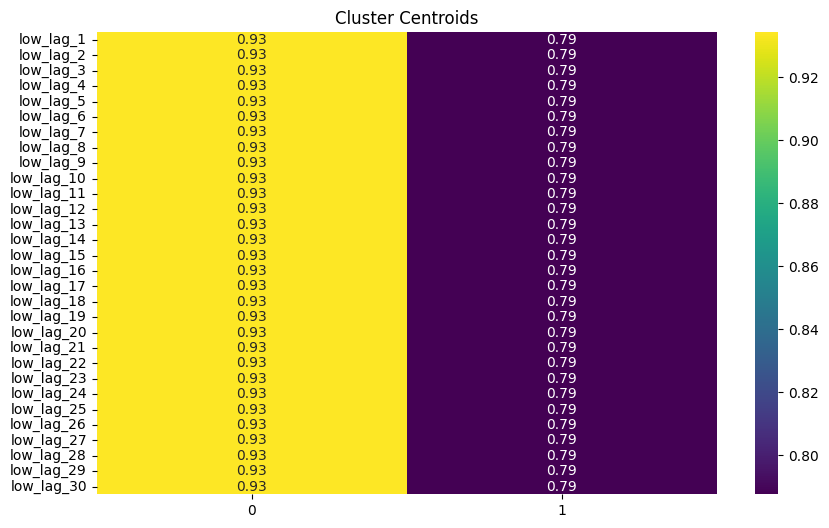

In [ ]:
dfb['cluster'] = cluster_labels
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df.T, annot=True, cmap="viridis")
plt.title("Cluster Centroids")
plt.show()


Step 6: Another pairplot which contains scatter plots, KDEs and histograms which gives an understanding of the following:



*   The pairplot includea a histogram or KDE (Kernel Density Estimate) plot for the single feature, showing its distribution. This can give insights into the central tendency, spread, and the presence of any outliers in the feature.


*   The pairplot can indicate how densely populated each cluster is and if there is any significant overlap between the clusters. Overlapping distributions may suggest that the single feature alone is insufficient for distinguishing between clusters.



In [ ]:
sns.pairplot(dfb,hue = 'cluster', palette='viridis', markers='o')
plt.suptitle("Scatter Plot Matrix of Clusters", y=1.02)
plt.show()

(note: I couldn't execute this code as it was highly computationally expensive for my computer.)

###End of Assignment